# QUELLE ÉVOLUTION DE L'ACTIVITÉ CES DERNIÈRES ANNÉES ?

In [2]:
import pandas as pd
import numpy as np
from datetime import datetime as dt,timedelta
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
#warnings.filterwarnings("ignore")

from kiblib.utils.db import DbConn
from kiblib.utils import lucas_sns_params

In [2]:
maj = dt.today().strftime('%d-%m-%Y')
maj_heure = dt.today().strftime('%Hh%M et %Ssecondes')
print(f"Dernière mise à jour le {maj} à {maj_heure}")

Dernière mise à jour le 05-04-2024 à 16h02 et 01secondes


In [3]:
db_conn = DbConn().create_engine()

In [4]:
# On définit la variable query comme un string contenant une requête SQL pour obtenir les entrées de l'année en cours
query_entrees = """SELECT YEAR(`datetime`) AS "année",SUM(entrees) AS "entrées"
FROM statdb.stat_entrees se
GROUP BY YEAR(`datetime`)"""

In [5]:
query_ordis = """SELECT YEAR(heure_deb) AS "année", COUNT(*) as "connexions aux ordinateurs" 
FROM statdb.stat_webkiosk sw 
GROUP BY YEAR(heure_deb)"""

In [6]:
query_wifi = """SELECT YEAR(start_wifi) AS "année", COUNT(*) as "connexions au wifi" 
FROM statdb.stat_wifi sw 
GROUP BY YEAR(start_wifi)"""

In [7]:
query_prets = """SELECT YEAR(issuedate) AS "année", COUNT(*) as "prets" 
FROM statdb.stat_issues si
WHERE YEAR(issuedate) > 2018
GROUP BY YEAR(issuedate)"""

In [8]:
query_resas = """SELECT YEAR(reservedate) AS "année", COUNT(*) as "réservations" 
FROM statdb.stat_reserves sr
GROUP BY YEAR(reservedate)"""

In [9]:
query_web = """SELECT YEAR(`date`) AS "année", SUM(visites) as "réservations" 
FROM statdb.stat_web2 sw
GROUP BY YEAR(`date`)"""

In [10]:
entrees = pd.read_sql(query_entrees,db_conn)

In [11]:
ordis = pd.read_sql(query_ordis,db_conn)

In [12]:
wifi = pd.read_sql(query_wifi,db_conn)

In [13]:
prets = pd.read_sql(query_prets,db_conn)

In [14]:
resas = pd.read_sql(query_resas,db_conn)

In [5]:
bnr = pd.read_excel('../stats_bnr_synthese.xlsx')

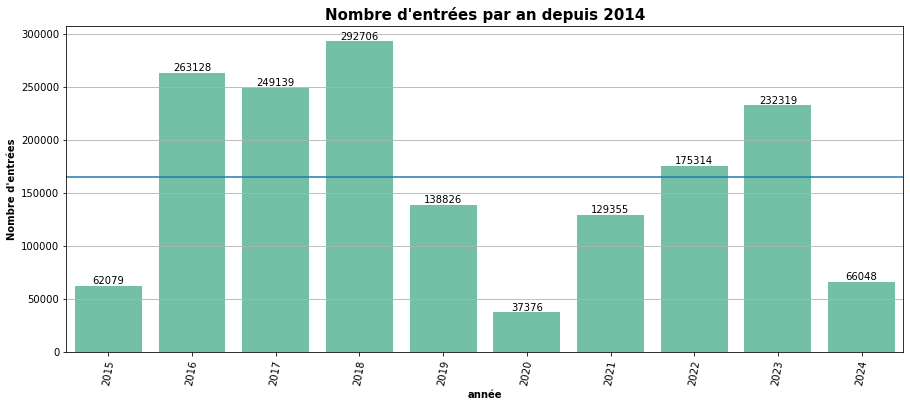

In [15]:
ax = sns.barplot(data=entrees,
                 x='année',
                 y='entrées',
                 color='mediumaquamarine')
ax.set_title("Nombre d'entrées par an depuis 2014")
ax.set_ylabel("Nombre d'entrées")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.axhline(y=int(entrees['entrées'].mean()))
for i in ax.containers:
    ax.bar_label(i,)

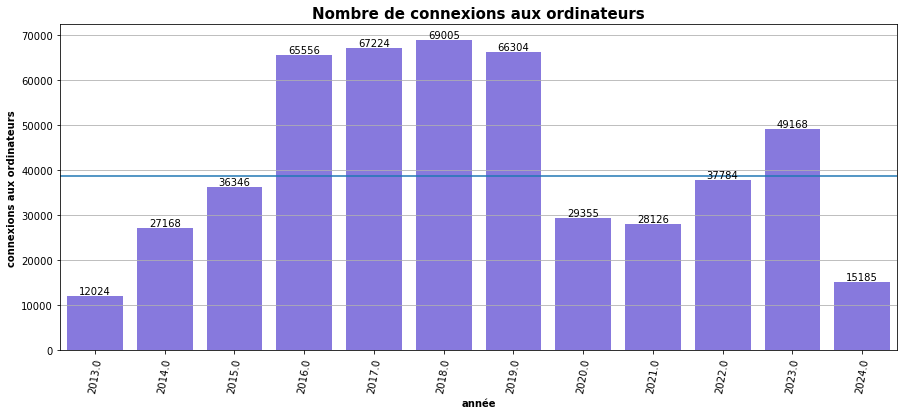

In [23]:
ax = sns.barplot(data=ordis,
                 x='année',
                 y='connexions aux ordinateurs',
                 label='ordinateur',
                 color='mediumslateblue') 
ax.set_title("Nombre de connexions aux ordinateurs")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.axhline(y=int(ordis['connexions aux ordinateurs'].mean()))
for i in ax.containers:
    ax.bar_label(i,)

In [11]:
ax = sns.barplot(data=wifi,
                 x='année',
                 y='connexions au wifi',
                 label='wifi',
                 color='blue') 
ax.set_title("Nombre de connexions au wifi")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.axhline(y=int(wifi['connexions au wifi'].mean()))
for i in ax.containers:
    ax.bar_label(i,)

NameError: name 'wifi' is not defined

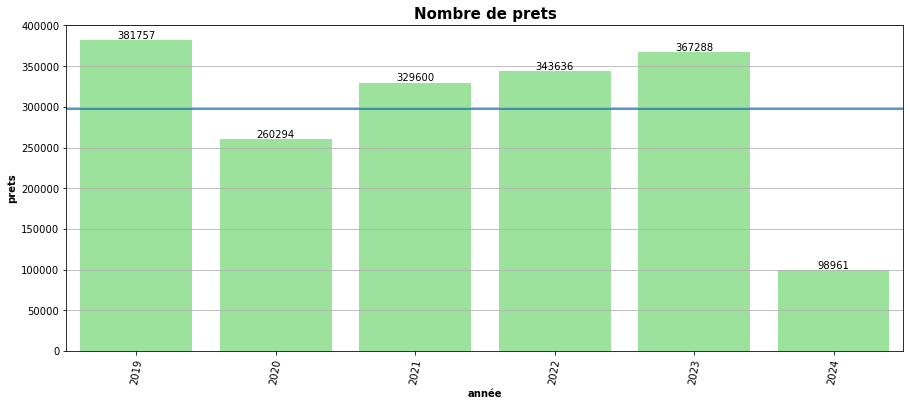

In [18]:
ax = sns.barplot(data=prets,
                 x='année',
                 y='prets',
                 color='lightgreen') 
ax.set_title("Nombre de prets")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.axhline(y=int(prets['prets'].mean()))
for i in ax.containers:
    ax.bar_label(i,)

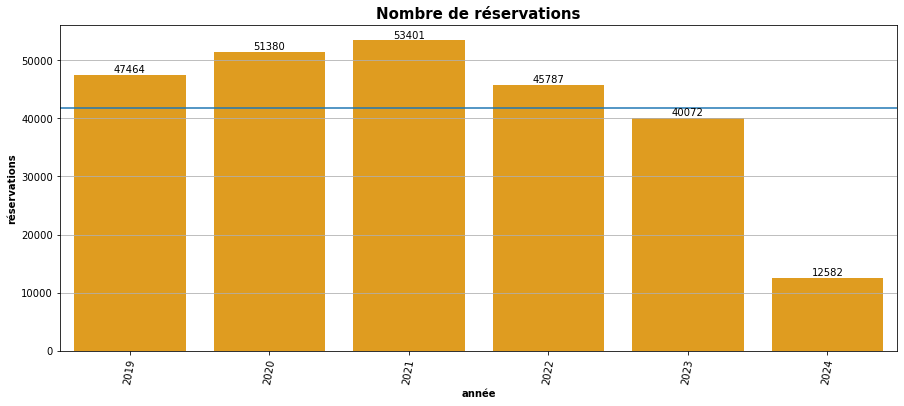

In [19]:
ax = sns.barplot(data=resas,
                 x='année',
                 y='réservations',
                 color='orange') 
ax.set_title("Nombre de réservations")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.axhline(y=int(resas['réservations'].mean()))
for i in ax.containers:
    ax.bar_label(i,)

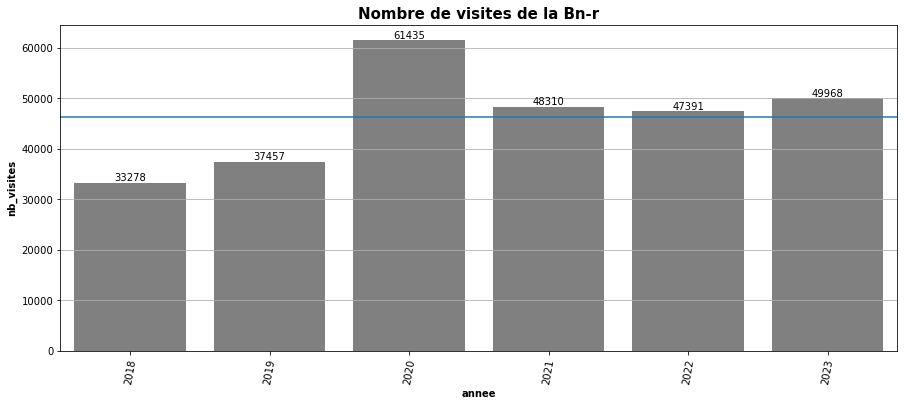

In [10]:
ax = sns.barplot(data=bnr,
                 x='annee',
                 y='nb_visites',
                 color='grey') 
ax.set_title("Nombre de visites de la Bn-r")
ax.tick_params(axis='x',rotation=80,bottom=True)
ax.axhline(y=int(bnr['nb_visites'].mean()))
for i in ax.containers:
    ax.bar_label(i,)